In [1]:
import keras
import os
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

/Users/tyronemariano/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
np.random.seed(143)

In [3]:
os.environ["KERAS_BACKEND"] = 'tensorflow'

In [4]:
SIZE = 256
batch_size = 16

In [5]:
from tensorflow.keras.regularizers import l2

# Increase filters gradually and reduce Dense layers
INPUT_SHAPE = (SIZE, SIZE, 3)

inp = keras.layers.Input(shape=INPUT_SHAPE)
# Start with fewer filters and increase
conv1 = keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis=-1)(pool1)
drop1 = keras.layers.Dropout(rate=0.25)(norm1)

conv2 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
norm2 = keras.layers.BatchNormalization(axis=-1)(pool2)
drop2 = keras.layers.Dropout(rate=0.25)(norm2)

flat = keras.layers.Flatten()(drop2)

# Single Dense layer with fewer units
hidden1 = keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01))(flat)
norm3 = keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.3)(norm3)

out = keras.layers.Dense(4, activation='softmax')(drop3)

In [6]:
model = keras.Model(inputs = inp, outputs = out)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Add learning rate reduction callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

In [7]:
# Use lower learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Reduced from default 0.001
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,388,580 (257.07 MB)

 Trainable params: 67,386,404 (257.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

None


In [9]:
#initialize datagen for train, test, validation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [10]:
#create generator/iterator

train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,        # Reduced from 10
    shear_range=0.1,        # Reduced from 0.2
    zoom_range=0.1,         # Reduced from 0.2
    horizontal_flip=True
)

validation_generator = validation_datagen.flow_from_directory(
    'archive/val',
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    'archive/test',
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

Found 6326 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
Found 771 images belonging to 4 classes.


In [11]:
images, labels = next(train_generator)


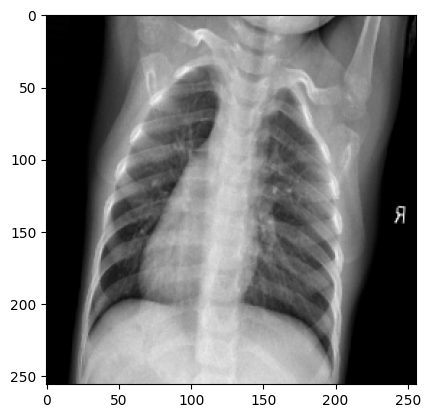

In [12]:
plt.imshow(images[0])

In [13]:
# from keras.callbacks import ModelCheckpoint

# filepath = "saved_models/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [cehckout]

In [ ]:
# Add callback when training
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[reduce_lr]
)



Epoch 1/50


/Users/tyronemariano/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


396/396 ━━━━━━━━━━━━━━━━━━━━ 237s 591ms/step - accuracy: 0.7267 - loss: 0.8429 - val_accuracy: 0.5526 - val_loss: 0.9704
Epoch 2/50


2025-01-30 12:35:37.104497: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5526 - val_loss: 0.9704
Epoch 3/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 262s 657ms/step - accuracy: 0.8498 - loss: 0.4388 - val_accuracy: 0.6053 - val_loss: 2.3448
Epoch 4/50


2025-01-30 12:39:59.144823: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6053 - val_loss: 2.3448
Epoch 5/50
 52/396 ━━━━━━━━━━━━━━━━━━━━ 3:58 693ms/step - accuracy: 0.8828 - loss: 0.3587

In [15]:
evaluation = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.7686 - loss: 0.5706


In [16]:
print(f'Test Loss: {evaluation[0]:.4f}')
print(f'Test Accuracy: {evaluation[1]:.4f}')

Test Loss: 0.9088
Test Accuracy: 0.6419


In [ ]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
t = f.suptitle("CNN Performance")
max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1, max_epoch))

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel("Accuracy Value")
ax1.set_xlabel("Epoch")
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel("Loss Value")
ax2.set_xlabel("Epoch")
l2 = ax2.legend(loc="best")

NameError: name 'plt' is not defined

In [18]:
model.save(os.path.expanduser('~/Desktop/xray_cnn1.h5'))